<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

Before runing this demo, please download models from [https://nomeroff.net.ua/models/](https://nomeroff.net.ua/models/) to **./models/** directory. 

In [1]:
# Import all necessary libraries.
import os
import cv2
import numpy as np
import sys
import json
import time
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')

# specify the path to Mask_RCNN if you placed it outside Nomeroff-net project
MASK_RCNN_DIR = os.path.join(NOMEROFF_NET_DIR, 'Mask_RCNN')

MASK_RCNN_LOG_DIR = os.path.join(NOMEROFF_NET_DIR, 'logs')
MASK_RCNN_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/mask_rcnn_numberplate_0700.h5")
OPTIONS_MODEL_PATH =  os.path.join(NOMEROFF_NET_DIR, "models/numberplate_options_2019_05_20.h5")

# If you use gpu version tensorflow please change model to gpu version named like *-gpu.pb
mode = "cpu"
# OCR_NP_UKR_TEXT = os.path.join(NOMEROFF_NET_DIR, "models/anpr_ocr_ua_12-{}.h5".format(mode))
OCR_NP_EU_TEXT =  os.path.join(NOMEROFF_NET_DIR, "models/anpr_ocr_eu_2-{}.h5".format(mode))
OCR_NP_RU_TEXT =  os.path.join(NOMEROFF_NET_DIR, "models/anpr_ocr_ru_3-{}.h5".format(mode))
OCR_NP_KZ_TEXT =  os.path.join(NOMEROFF_NET_DIR, "models/fourthtry.h5")
OCR_NP_KZ_2LINE_TEXT = os.path.join(NOMEROFF_NET_DIR, "models/anpr_ocr_kz-box_1-{}.h5".format(mode))

sys.path.append(NOMEROFF_NET_DIR)

Also you may use .pb models for options detectors or OCR detectors. 
More about conversion and preparing for inference withit https://github.com/ria-com/nomeroff-net/blob/master/examples/inference_convert.ipynb.

In [2]:
# Import license plate recognition tools.
from NomeroffNet import  filters, RectDetector, TextDetector, OptionsDetector, Detector, textPostprocessing, textPostprocessingAsync

# Initialize npdetector with default configuration file.
nnet = Detector(MASK_RCNN_DIR, MASK_RCNN_LOG_DIR)
nnet.loadModel(MASK_RCNN_MODEL_PATH)

rectDetector = RectDetector()

optionsDetector = OptionsDetector({
    "class_region": ["xx_unknown", "eu_ua_2015", "eu_ua_2004", "eu_ua_1995", "eu", "xx_transit", "ru", "kz", "kz_box"]
})
optionsDetector.load(OPTIONS_MODEL_PATH)

# Initialize text detector.
textDetector = TextDetector({
#     "eu_ua_2004_2015": {
#         "for_regions": ["eu_ua_2015", "eu_ua_2004"],
#         "model_path": OCR_NP_UKR_TEXT
#     },
    "eu": {
        "for_regions": ["eu", "eu_ua_1995"],
        "model_path": OCR_NP_EU_TEXT
    },
    "ru": {
        "for_regions": ["ru"],
        "model_path": OCR_NP_RU_TEXT
    },
    "kz": {
        "for_regions": ["kz"],
        "model_path": OCR_NP_KZ_TEXT
    },
#     "kz_box": {
#         "for_regions": ["kz_box"],
#         "model_path": OCR_NP_KZ_2LINE_TEXT
#     }
})

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


finalimages/car26.jpg


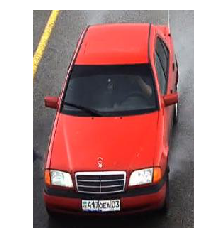

[[[123.         266.        ]
  [123.         283.        ]
  [ 67.         283.        ]
  [ 67.         266.        ]]

 [[172.60633204 212.55858393]
  [170.92465344 244.51047745]
  [134.         247.14795269]
  [134.         215.31617908]]]


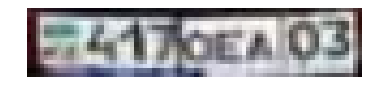

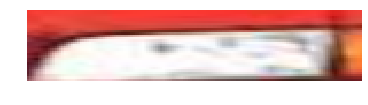

['kz', 'xx_unknown']
['417DEA03', '']
Time: 9.514262914657593
finalimages/car15.jpg


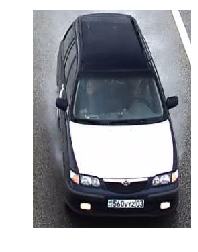

[[[109.         280.07655329]
  [167.         278.96116867]
  [167.         296.        ]
  [109.         296.        ]]]


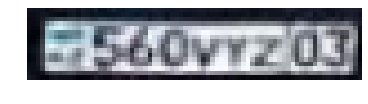

['kz']
['560VYZ03']
Time: 7.425997495651245
finalimages/car20.jpg


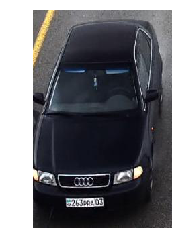

[[[106. 277.]
  [106. 294.]
  [ 47. 294.]
  [ 47. 277.]]]


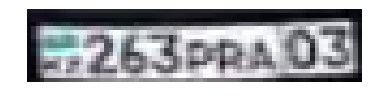

['kz']
['763RRA03']
Time: 8.90710711479187
finalimages/car4.jpg


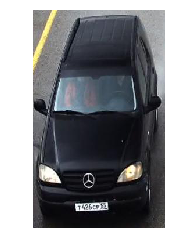

[[[129.65941171 331.        ]
  [132.72888317 346.3473573 ]
  [ 70.30818432 349.12161059]
  [ 68.91421427 331.        ]]

 [[ 48.9063115  267.58002512]
  [ 55.37338408 302.5022171 ]
  [ 14.66886092 296.68728522]
  [  8.20178833 261.76509324]]]


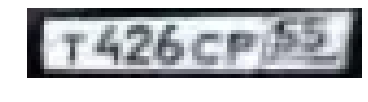

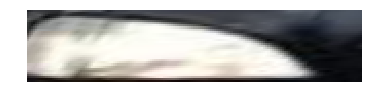

['ru', 'xx_unknown']
['T426CP55', '']
Time: 10.14049220085144
finalimages/car3.jpg


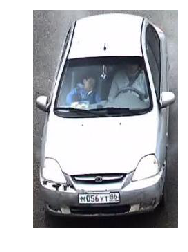

[[[ 64.         264.        ]
  [126.         264.        ]
  [126.         281.35770967]
  [ 64.         279.88151919]]]


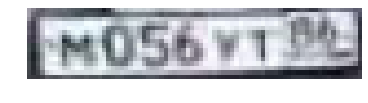

['ru']
['M056Y111']
Time: 8.836437702178955
finalimages/car22.jpg


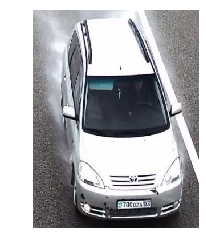

[[[208.         329.95604921]
  [208.         348.06555644]
  [146.         350.06555644]
  [146.         331.30387529]]]


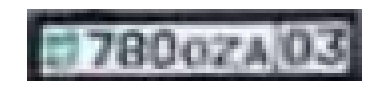

['kz']
['780OZA03']
Time: 8.639379501342773
finalimages/car14.jpg


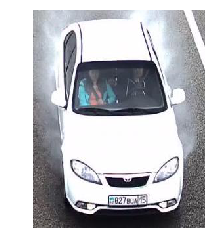

[[[174.         278.95181414]
  [174.         298.        ]
  [114.         298.        ]
  [114.         280.38038557]]]


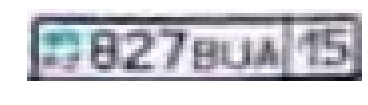

['kz']
['827BA15']
Time: 8.853049278259277
finalimages/car23.jpg


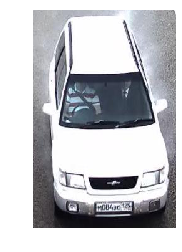

[[[161.         306.        ]
  [161.         323.90601634]
  [100.14914855 325.05414562]
  [ 98.68344504 306.        ]]]


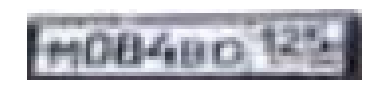

['xx_unknown']
['']
Time: 9.052019596099854
finalimages/car9.jpg


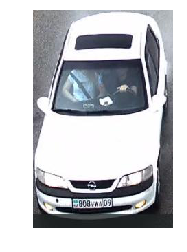

[[[115.64029742 269.97585713]
  [119.19949705 287.77185529]
  [ 57.54660381 289.0300776 ]
  [ 54.17479899 272.1710535 ]]

 [[146.         279.71208219]
  [165.         269.15652664]
  [165.         281.07036752]
  [146.         293.73703418]]]


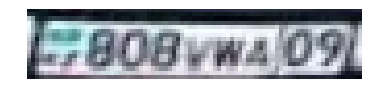

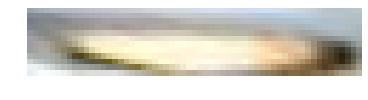

['kz', 'xx_unknown']
['808VWA03', '']
Time: 9.131619215011597
finalimages/car1.jpg


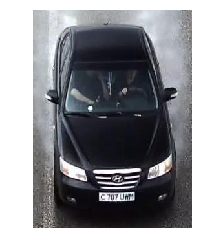

[[[158.         280.        ]
  [158.         297.        ]
  [100.         297.        ]
  [100.         280.        ]]

 [[177.10188082 243.37189856]
  [215.         218.65573388]
  [215.         248.07752396]
  [175.6213991  265.57912436]]]


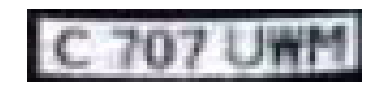

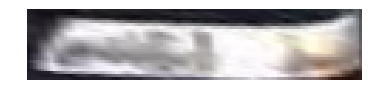

['kz', 'xx_unknown']
['C707UWM', '']
Time: 8.640019655227661
finalimages/car24.jpg


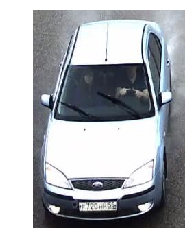

[[[123.         275.95604921]
  [123.         293.72147099]
  [ 66.         295.04705239]
  [ 66.         277.19517964]]]


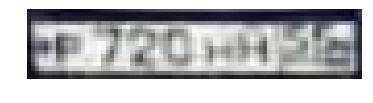

['ru']
['P720951']
Time: 8.857759714126587
finalimages/car21.jpg


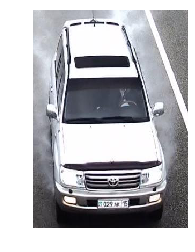

[[[119.14058829 350.        ]
  [179.13999261 350.        ]
  [177.87332594 369.        ]
  [115.34058829 369.        ]]

 [[178.          84.        ]
  [178.         109.14007564]
  [ 79.         106.83775006]
  [ 79.          84.        ]]

 [[215.         344.55112348]
  [240.35849057 340.92848197]
  [240.35849057 355.49290167]
  [215.         359.11554318]]]


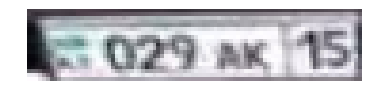

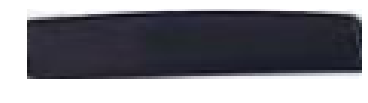

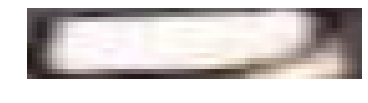

['xx_unknown', 'xx_unknown', 'xx_unknown']
['', '', '']
Time: 8.71487832069397
finalimages/car7.jpg


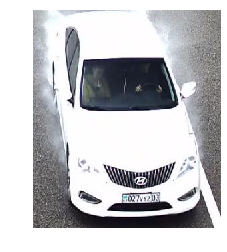

[[[134.45138148 273.        ]
  [196.0774939  273.        ]
  [191.56407629 288.79696166]
  [129.56104574 290.11617507]]]


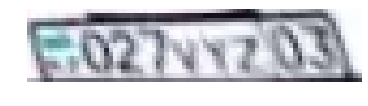

['eu_ua_1995']
['022137O3']
Time: 9.085232257843018
finalimages/car25.jpg


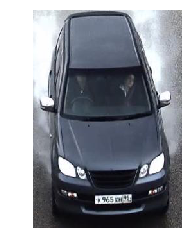

[[[153.71073069 284.95768007]
  [155.43796974 302.2300705 ]
  [ 95.         304.06152412]
  [ 95.         286.38964911]]]


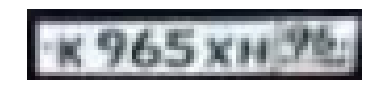

['ru']
['K965XH96']
Time: 8.706793546676636
finalimages/car12.jpg


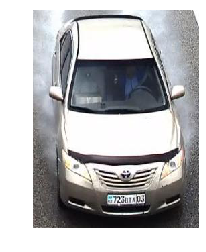

[[[168. 272.]
  [168. 290.]
  [110. 290.]
  [110. 272.]]]


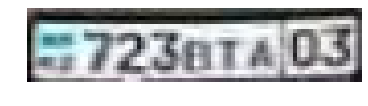

['kz']
['7273BTA03']
Time: 8.517590045928955
finalimages/car16.jpg


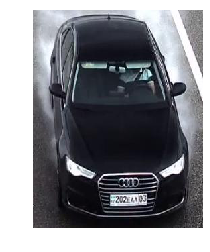

[[[113.         273.        ]
  [171.         273.        ]
  [171.         291.        ]
  [113.         291.        ]]

 [[190.81194218 221.31300927]
  [234.56153491 211.80222824]
  [223.95504296 243.6217041 ]
  [180.20545023 253.13248513]]

 [[101.3051145  230.90383926]
  [ 91.05049169 254.8312925 ]
  [ 35.21288985 236.8834919 ]
  [ 45.46751266 212.95603867]]]


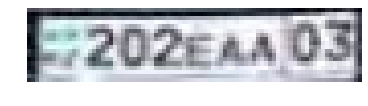

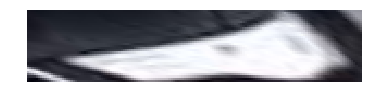

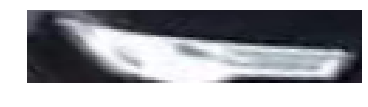

['kz', 'xx_unknown', 'xx_unknown']
['202FAA03', '', '']
Time: 9.578361988067627
finalimages/car17.jpg


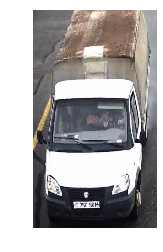

[[[147.         415.96330581]
  [147.         435.        ]
  [ 86.         435.        ]
  [ 86.         417.07239672]]

 [[ 62.71891719 363.90801984]
  [ 67.20491913 410.26337323]
  [ 31.23961551 398.90590893]
  [ 26.75361357 352.55055553]]]


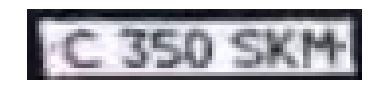

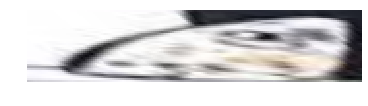

['kz', 'xx_unknown']
['C350SKM', '']
Time: 8.992248296737671
finalimages/car8.jpg


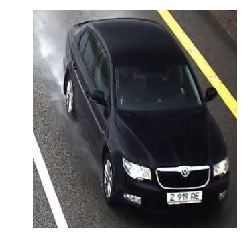

[[[253.77329827 266.93766308]
  [255.26812808 286.37045067]
  [198.         289.09750438]
  [198.         268.86088026]]

 [[175.53840553 221.27021627]
  [180.81203774 255.54882568]
  [128.62436516 246.55095109]
  [123.35073294 212.27234168]]

 [[163.         278.55848156]
  [163.         293.73606798]
  [136.15736378 280.31474987]
  [134.55179172 269.07574547]]]


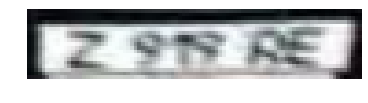

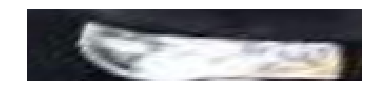

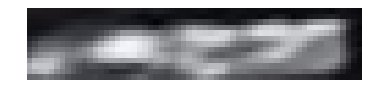

['xx_unknown', 'xx_unknown', 'xx_unknown']
['', '', '']
Time: 9.185132265090942
finalimages/car18.jpg


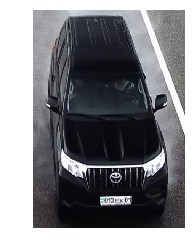

[[[185.         344.96396686]
  [185.         366.81347632]
  [122.         364.84472632]
  [122.         346.08896686]]]


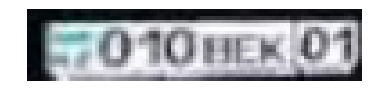

['kz']
['01KMX01']
Time: 8.652119398117065
finalimages/car5.jpg


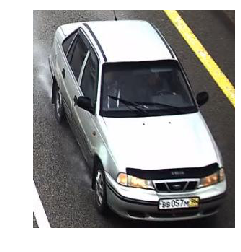

[[[173.77711628 258.        ]
  [232.82894433 258.        ]
  [227.86434776 272.8937897 ]
  [167.63148315 276.43689939]]]


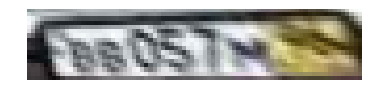

['xx_unknown']
['']
Time: 9.05571174621582
finalimages/car10.jpg


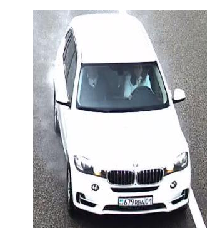

[[[191.         296.        ]
  [191.         313.03840831]
  [136.         315.07544535]
  [136.         296.        ]]]


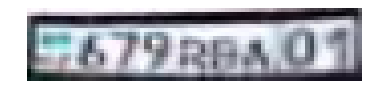

['kz']
['679ARA01']
Time: 8.829345464706421
finalimages/car11.jpg


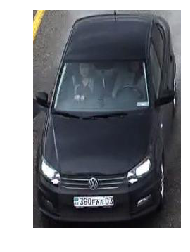

[[[ 57.         263.07655329]
  [115.         261.96116867]
  [115.         280.        ]
  [ 57.         280.        ]]]


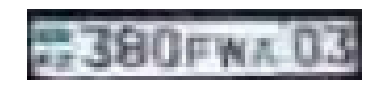

['kz']
['388PWA03']
Time: 8.220394849777222
finalimages/car19.jpg


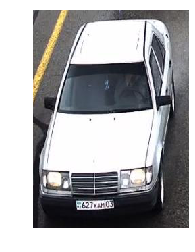

[[[ 63.         279.        ]
  [121.         279.        ]
  [121.         295.72778919]
  [ 63.         297.04597101]]]


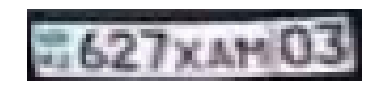

['kz']
['627XM03']
Time: 8.823605298995972
finalimages/car2.jpg


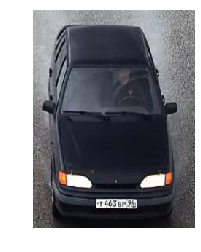

[[[143. 257.]
  [143. 273.]
  [ 84. 273.]
  [ 84. 257.]]]


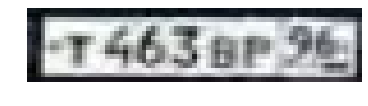

['ru']
['T463BAT56']
Time: 8.594933271408081
finalimages/car13.jpg


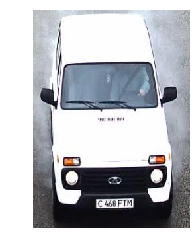

[[[ 93.         280.78213616]
  [153.         282.08648399]
  [153.         300.43316276]
  [ 93.         302.05478438]]]


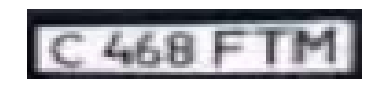

['kz']
['C468FTM']
Time: 8.932428359985352
finalimages/car6.jpg


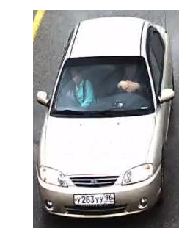

[[[110.85501649 248.        ]
  [112.21113891 265.62959141]
  [ 54.26425881 267.04292995]
  [ 52.53308336 248.        ]]]


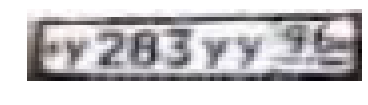

['ru']
['Y273YY96']
Time: 8.783361911773682


In [3]:
# Walking through the ./examples/images/ directory and checking each of the images for license plates.
rootDir = 'finalimages/'

max_img_w = 1600
for dirName, subdirList, fileList in os.walk(rootDir):
    for fname in fileList:
        start = time.time()
        img_path = os.path.join(dirName, fname)
        print(img_path)
        img = mpimg.imread(img_path)
        plt.axis("off")
        plt.imshow(img)
        plt.show()
         
        # corect size for better speed
        img_w = img.shape[1]
        img_h = img.shape[0]
        img_w_r = 1
        img_h_r = 1
        if img_w > max_img_w:
            resized_img = cv2.resize(img, (max_img_w, int(max_img_w/img_w*img_h)))
            img_w_r = img_w/max_img_w
            img_h_r = img_h/(max_img_w/img_w*img_h)
        else:
            resized_img = img

        NP = nnet.detect([img]) 
        
        # Generate image mask.
        cv_img_masks = await filters.cv_img_mask_async(NP)
            
        # Detect points.
        arrPoints = await rectDetector.detectAsync(cv_img_masks, outboundHeightOffset=3-img_w_r, fixGeometry=True, fixRectangleAngle=10)
        print(arrPoints)
        arrPoints[..., 1:2] = arrPoints[..., 1:2]*img_h_r
        arrPoints[..., 0:1] = arrPoints[..., 0:1]*img_w_r
        
        # cut zones
        zones = await rectDetector.get_cv_zonesBGR_async(img, arrPoints)
        toShowZones = await rectDetector.get_cv_zonesRGB_async(img, arrPoints)
        for zone, points in zip(toShowZones, arrPoints):
            plt.axis("off")
            plt.imshow(zone)
            plt.show()
    
        # find standart
        regionIds, stateIds = optionsDetector.predict(zones)
        regionNames = optionsDetector.getRegionLabels(regionIds)
        print(regionNames)

        # find text with postprocessing by standart  
        textArr = textDetector.predict(zones, regionNames)
        textArr = await textPostprocessingAsync(textArr, regionNames)
        print(textArr)
        end = time.time()
        print("Time: " + str(end-start))